In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [41]:
titanic_df = pd.read_csv('titanic.csv')

In [42]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [43]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [44]:
X = titanic_df[features]
y = titanic_df[target]

In [45]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [46]:
X['Age'].fillna(X['Age'].mean(), inplace=True)

C:\Users\Clarina Jones\AppData\Local\Temp\ipykernel_34820\495173069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Build Logistic Regression model with scaled data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [70]:
y_pred_logistic = logistic_model.predict(X_test)

C:\Users\Clarina Jones\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.6201117318435754


In [72]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred_linear = linear_model.predict(X_test)

In [74]:
y_pred_linear = [1 if x >= 0.5 else 0 for x in y_pred_linear]

In [75]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Regression Accuracy:", accuracy_linear)

Linear Regression Accuracy: 0.7932960893854749


In [76]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred_tree = tree_model.predict(X_test)

In [78]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier Accuracy:", accuracy_tree)

Decision Tree Classifier Accuracy: 0.7932960893854749


In [79]:
 import matplotlib.pyplot as plt

In [80]:
models = ['Logistic Regression', 'Linear Regression', 'Decision Tree Classifier']
accuracy_scores = [accuracy_logistic, accuracy_linear, accuracy_tree]

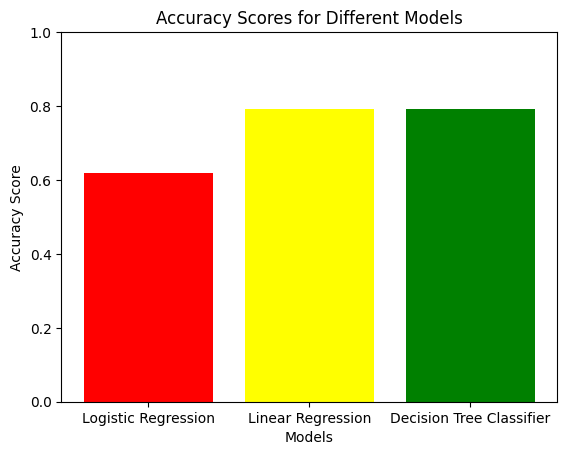

In [81]:
plt.bar(models, accuracy_scores, color=['red', 'yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)  
plt.show()

In [82]:
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Linear Regression Accuracy:", accuracy_linear)
print("Decision Tree Classifier Accuracy:", accuracy_tree)

Logistic Regression Accuracy: 0.6201117318435754
Linear Regression Accuracy: 0.7932960893854749
Decision Tree Classifier Accuracy: 0.7932960893854749
